#손실 곡선


*   케라스의 fit() 메서드는 History 클래스 객체를 반환한다.
*   History 객체는 훈련 과정에서 계산한 지표, 즉 손실과 정확도 값이 저장되어 있다.

이 값을 사용하여 그래프를 그릴 수 있다.



먼저 패션 MNIST 데이터셋을 적재하고 훈련 세트와 검증 세트로 나눈다.

In [4]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target,), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

그 다음으로 모델을 만든다.

다음으로, 간단한 함수를 하나 정의한다.

In [5]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100,activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

이 함수는 모델을 만드는 함수이다. a_layer 매개변수가 None이 아니라면 은닉층 뒤ㅔㅇ 또 하나의 킁을 추가하는 방식이다.

In [7]:
model = model_fn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


정의한 함수를 통해 모델을 만들 수 있음을 알 수 있다. 다음으로 fit() 매서드의 결과를 history 변수에 담아본다.

In [9]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

history 객체에는 훈련 특정값이 담겨있는 history 딕셔너리가 있다. 아래는 이 딕셔너리의 값이다.

In [11]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


hisotry 객체에는 손실과 정확도가 포함되어 있다.

케라스는 기본적으로 에포크마다 손실을 계삲나다. 정확도는 compile() 메서드에서 metrics 매개변수에  'accuracy' 를 추가했기 때문에 history 속성에 포함된다.

history 속성에 포함된 손실과 정확도는 에포크마다 계산한 값이 순서대로 나열된 단순한 리스트이다. 맷 플롯립을 사용해 그래프로 나타낼 수 있다.

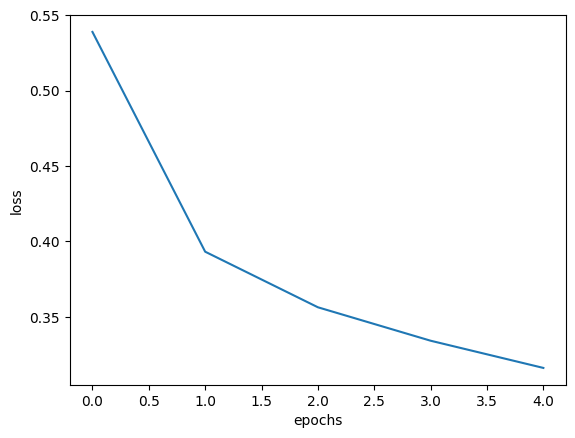

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

에포크가 0에서부터 4까지 x축에 표현된다.

다음은 정확도 출력이다.

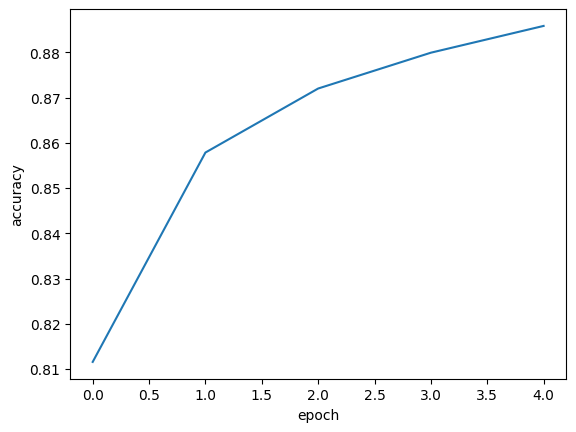

In [13]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

에포크가 증가할 때마다 손실이 감소하고 정확도가 향상된다. 그렇다면 에포크 횟수를 20으로 늘려 모델을 훈련하고 손실 그래프를 그려본다.

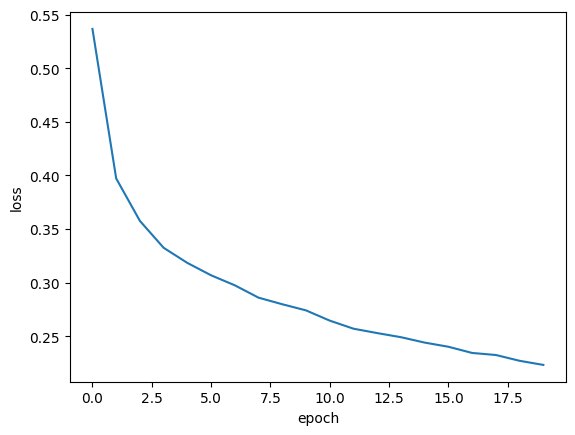

In [17]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

에포크가 증가함에 따라 손실이 감소하는 모습을 보인다. 과연 이전보다 더 나은 모델을 훈련한 것일까?

#검증 손실
에포크에 다른 과대적합을 파알하려면 훈련 세트에 대한 점수뿐만 아니라 검증세트에 대한 점수도 필요하다. 따라서 훈련 세트의 손실만 그리면 안된다.

인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 손실함수이다. 모델이 잘 훈련되었는지 판단하려면 정확도보다는 손실 함수의 값을 확인하는 것이 더 낫다.

먼저 에포트마다 검증 손실을 계산하기 위해 케라스 모델의 fit() 메서드에 검증 데이터를 전달 할 수 있다. validation_data 매개변수에 검증에 사용할 입력과 타깃값을 튜플로 만들어 전달한다.

In [19]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

반환된 history 딕셔너리에 아떤 값이 들어있는지 확인한다.

In [20]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


검증 세트에 대한 손실은 val_loss에 들어있고, 정확도는 val_accuracy 에 들어있다. 과대, 과소적합 문제를 조사하기 위해 훈련 손실과 검증 손실을 한 그래프에 그려서 비교해본다.

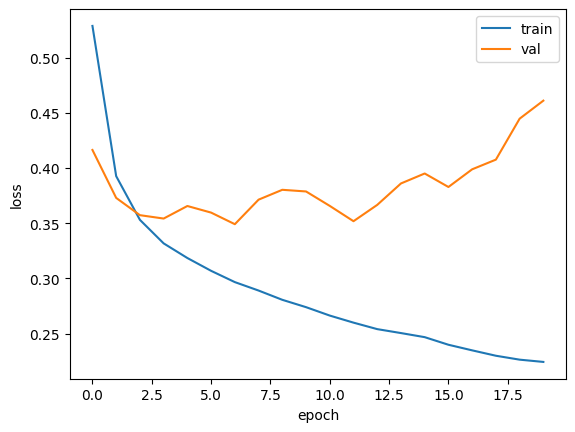

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

초기에는 검증 손실이 감소하다가 다섯 번재 에포크만에 다시 상승한다.

훈련 손실은 꾸준히 감소하기 때문에 전형적인 과대적합 모델이다. 검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들 뿐만 아니라 검증 세트에 대한 정확도도 높아질 것이다.

과대 적합을 막기 위해 옵티마이저 하이퍼파라미터를 조정하여 과대적합을 완화시킬 수 있는지 확인한다.

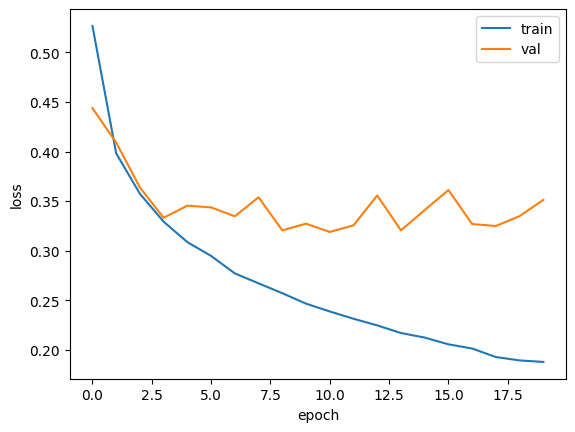

In [23]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

과대 적합이 많이 줄어들었다. 검증 손실 그래프에 여전히 요동이 남아있지만 열번째 에포크까지 감소 추세가 이어진다. Adam 옵티마이저가 이 데이터에 잘 맞는다는 것이다.

더 나은 손실 곡선을 얻으려면 학습률을 조정하여 다시 시도할 수 있다. 그 방법으로 ***드롭 아웃*** 이 있다.

#드롭 아웃
***드롭 아웃***은 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막는 방식이다. 랜덤한 뉴런의 출력을 0으로 만들어 과대적합을 막는 것이다.

이때 얼마나 많은 뉴런을 드롭할지는 우리가 정해야 할 도 다른 하이퍼파라미터이다.

드롭아웃이 어떻게 과대적합을 막을 수 있을까.     
이전 츠의 일부 뉴런이 랜덤하게 거지면 특정 뉴런에 과대하게 의존할 수 있고 모든 입력에 대해 주의를 기울여야 한다. 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 신경망은 더 안정적인 예측을 만들 수 있다.

케라스에서 드롭아웃을 keras.layers 패키지 아래의 Dropout 클래스로 제공한다. 어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 하는 것이다.     
층처럼 제공하지만 훈련되는 파라미터는 없다.

model_fn() 함수에 매개변수로 드롭아웃 객체를 전달하여 층을 추가한다. 30%을 드롭아웃하게 한다.

In [26]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


드옵아웃 되는 층이 추가되었고 이 층은 파라미터가 없다 또한 입력과 출력의 크기가 같다. 일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않는다.

훈련이 끝난 뒤에는 평가나 예측을 수행할때 드롭아웃을 적용하지 말아야 한다. 훈련된 모든 뉴런을 사용해야 올바른 예측을 해야 한다.

텐서플로와 케라스는 모델을 평가와 예측에 사용할 때는 자동으로 드롭아웃을 적용하지 않는다. 그래서 마음 편하게 검증 점수를 계산할 수 있다.

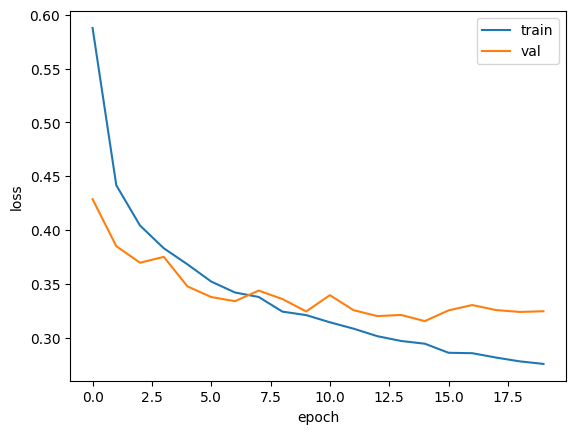

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

과대적합이 많이 줄었다. 열번재 에포크 정도에서 검증 손실의 감소가 멈추지만 크게 상승하지도 않고 유지된다.

이 모델은 20번의 에포크동안 훈련햇기 때문에 결국 다소 과대적합되있다. 다라서 에포크 횟수를 10회로 다시 훈련해야 한다.

#모델 복원
에포크 횟수를 10으로 다시 지정하고 훈현한다. 또한 나중에 훈련된 모델의 파라미터를 저장하기 위해 save_weights() 메서드를 사용할 수 있다.

In [28]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

model.save_weights('model-weights.h5')

또한 모델 구조와 모델 파라미터를 함께 저장하는 save() 메서드 도한 제공한다. 텐서플로의 SavedModel 포맷으로 저장하지만 파일의 확장자가 '.h5' 이라면 HDF5 포맷으로 저장한다.

In [29]:
model.save('model-whole.h5')

두 파일을 확인한다.

In [30]:
!ls -al *.h5

-rw-r--r-- 1 root root 333320 Aug 21 14:01 model-weights.h5
-rw-r--r-- 1 root root 981176 Aug 21 14:01 model-whole.h5


훈련한 모델의 파라미터를 저자했으니 후녈ㄴ을 하지 않은 새로운 모델을 만들고 model-wiehgt.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용해본다.

In [34]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

save_weights() 메서드와 쌍을 이루는 메서드는 load_weight임을 알 수 있다.

이제 이 모델의 검증정확도를 확인해본다. 케라스에서 예측을 수행하는 predict 메서드는 사이킷런과 달리 샘플마다 10개의 클래시에 대한 확률을 반환한다.

패션 MNIST 데이터셋에서 덜어낸 검증 세트의 샘플 개수는 12000개이므로 predict 메서드는 (12000, 10) 크기의 배열을 반환한다.

띠라서 먼저 10개의 확률중에서 가장 클 값의 인덱스를 고랄 타깃 레이블과 비교하여 정확도를 계산해본다.

In [36]:
import numpy as np
val_labels= np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 3ms/step
0.8814166666666666


모델의 predict() 메서드 결과에서 가장 큰 값을 고르기 위해 넘파이 argmax() 함수를 사용했다. 이 함수는 배열에서 가장 큰 값의 안덱스를 반환한다.

argmax 함수의 axis=-1 은 배열의 마지막 차원을 따라 최댓값을 고른다. 검증 세트는 2차원 배열이기 때문에 마지막 차원은 1이 된다.

이번에는 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력해본다. 모델이 저장된 파일을 읽을 때는 케라스가 제공하는 load_model() 함수를 사용한다.

In [38]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3247 - accuracy: 0.8814


[0.32473623752593994, 0.8814166784286499]

같은 모델을 저장하고 불러들였으므로 동일한 정확도를 얻었다.

위에서는 과대적합을 확인하기 위해 두번의 훈련을 수행했다. 한번만 훈련하여 결과를 얻을 수는 없을

#콜백

콜백은 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로 keras.callbacks 패키지 아래에 있는 클래스들이다. fit()메서드의 callbacks 매개변수에 리스트로 전달하여 사용한다.

ModelCheckpoint 콜백은 기본적으로 에포크마다 모델을 저장한다. save_only=True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있다.

In [41]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only = True)

model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

save_best_only=True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있다.

model_fn 함수로 모델을 만들고 compile 메서드를 호출하는 것은 이전과 같은 방식이다.     
ModelCheckpoint 클래스의 객체 checkpoint_cb 를 만든 후 fit() 메서드의 callbacks 매개변수에 리스트로 감싸서 전달한다. 모델이 훈련한 후에 best-model.h5 에 최상의 검증 점수를 낸 모델이 저장된다. 이 모델을 load_model 함수로 다시 읽어서 예측을 수행한다.

In [42]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)


375/375 [==============================] - 1s 2ms/step - loss: 0.3292 - accuracy: 0.8830


[0.32919684052467346, 0.8830000162124634]

가장 낮은 검증 점수의 모델을 자동으로 저장해준다. 하지만 여전히 20번의 에포크 동안 훈련을 한다.        
 사실상 검증 점수가 상승하기 시작하면 과대적합이 이후에 더 커지기 때문에 훈련을 계속할 필요가 없다.      
  이 타이밍에 훈련을 미리 중지하는 것을 ***조기종료*** 라고 한다.

##조기 종료
훈련 에포크 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아주기 때문에 규제 방법중 하나로 생각할 수 있다.

케라스에서는 조기 종료를 위한 EarlyStopping 콜백을 제공한다. 이 콜백의 patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 횟수로 지정한다.      
또한 restore_best_weights 매개변수를 True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌린다.        
patience = 2 로 지정하면 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지한다.

EarlyStopping 콜백을 ModelCheckpoint 콜백과 함께 사용하면 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지할 수 있다.     
또한 훈련을 중지한 다음 현재 모델의 파라미터를 최상의 파아미터로 되돌린다.

In [47]:
##EarlyStopping 콜백과 ModelCheckpoint 콜백을 같이 사용하는 예제

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only = True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

hisotry = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

훈련이 끝나고 몇 번재 에포크에서 훈련이 중지되었는지는 early_stopping_cb 객체의 stopped_epoch 속성에서 확인할 수 있다.

In [48]:
print(early_stopping_cb.stopped_epoch)

7


해당 모델에서는 8번째 에포크에서 훈련이 중지되었음을 알 수 있다. 에포크 횟수는 0번째부터 시작하므로 7이 출력됨은 8번째 에포크 회수이다.        
patience를 2로 지정했으므로 최상의 모델을 7번재 에포크일 것이다.

훈련 솔실과 검증 손실을 출력해서 확인해본다.

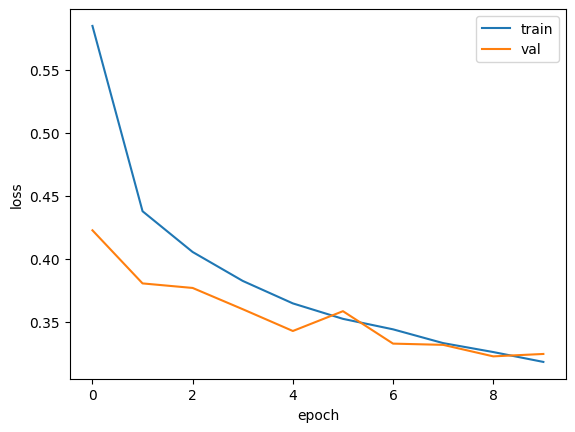

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

7번째에서 가장 낮을 손실을 기록했고 9번째에서 훈련이 중지되었다.

이 방식은 컴퓨터 자원과 시간을 악리 수 잇고 ModelCheckpoint 콜백과 함게 사용하면 최상의 모델을 자동으로 지정해주므로 편리하다.

마지막으로 조기 종료로 얻은 모델을 사용해 검증 세트에 대한 성능을 확인해본다.

In [51]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3336 - accuracy: 0.8789


[0.33356499671936035, 0.8789166808128357]